In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# generate random noise with gaussian distribution
def generate_gaussian_noise(mu, sigma, bits_no,bit_samples_no):
    return np.random.normal(mu, sigma, bits_no * bit_samples_no)

In [3]:
# generate random bits with values {-1,1} with probability = 0.5
def generate_random_bits(bits_no):
    return np.random.choice(a = [-1,1], size=bits_no, p=[1./2, 1./2])

In [4]:
def add_gaussian_noise(bits_no, bit_samples_no, signal_bits, noise):
    size = bits_no * bit_samples_no
    signal_samples=np.zeros(size)
    noisy_signal_samples=np.zeros(size)
    
    # repeat the bit with no of samples per bit
    for i in range(bits_no):
    # 0:9 10:19 20:39
        signal_samples[i * bit_samples_no : (i + 1) * bit_samples_no] = signal_bits[i]
        # add signal to the noise
        noisy_signal_samples = signal_samples + noise
        
    return signal_samples,noisy_signal_samples

In [5]:
def convolution(noisy_signal_samples,receive_filter,bits_no,bit_samples_no):
    size = bits_no * bit_samples_no
    result_samples = np.zeros(size)
    result_bits = np.zeros(bits_no)
    decoded_result_bits = np.zeros(bits_no)
    
    # convolution between signal and receive filter to get filter output
    if(receive_filter is None):
        result_samples = noisy_signal_samples
    else:
        result_samples = np.convolve(noisy_signal_samples, receive_filter)
        # sampling at T
        for i in range(bits_no):
            # 0:9->9 10:19->19 20:29->29
            result_bits[i]=result_samples[i * bit_samples_no + bit_samples_no - 1]
            # decoding to {-1,1}
            decoded_result_bits = np.sign(result_bits)
            
    return result_samples,result_bits,decoded_result_bits

In [6]:
def calc_simulation_error(signal_bits,decoded_result_bits,bits_no):
    error = np.sum(signal_bits != decoded_result_bits) / bits_no
    return error

In [7]:
def calc_theoretical_error(z):
    return math.erfc(z)

In [8]:
def test(receive_filter, thr_error_coeff, is_plot):
    sim_error, thr_error = [], []
    
    for E_No_db in range(-10, 21):
        E_No = 10 ** (E_No_db / 10) #get E/No from its db value
        E = 1
        sigma = np.sqrt(E/(2*E_No))
        noise = generate_gaussian_noise(0, sigma, bits_no, bit_samples_no)
        signal_samples, noisy_signal_samples = add_gaussian_noise(bits_no, bit_samples_no, signal_bits,
        noise)
        result_samples,result_bits,decoded_result_bits = convolution(noisy_signal_samples, receive_filter,
        bits_no, bit_samples_no)
        x = calc_simulation_error(signal_bits,decoded_result_bits,bits_no)
        y = 0.5 * calc_theoretical_error(thr_error_coeff * (E_No ** 0.5))
        sim_error.append(x)
        thr_error.append(y)
        
    if(is_plot):
        plt.figure(figsize=(10,7))
        plt.plot(range(0,len(signal_bits)), signal_bits)
        plt.title("Original bits")
        plt.xlabel('time')
        plt.ylabel('value')
        plt.figure(figsize=(10,7))
        plt.plot(range(0,len(signal_samples)), signal_samples)
        plt.title("Original signal")
        plt.xlabel('time')
        plt.ylabel('value')
        plt.figure(figsize=(10,7))
        plt.plot(range(0,len(result_samples)), result_samples)
        plt.title("Output of receive filter")
        plt.xlabel('time')
        plt.ylabel('value')
        plt.figure(figsize=(10,7))
        plt.plot(range(0,len(decoded_result_bits)), decoded_result_bits)
        plt.title("Output after decoding")
        plt.xlabel('time')
        plt.ylabel('value')
         
    return sim_error, thr_error

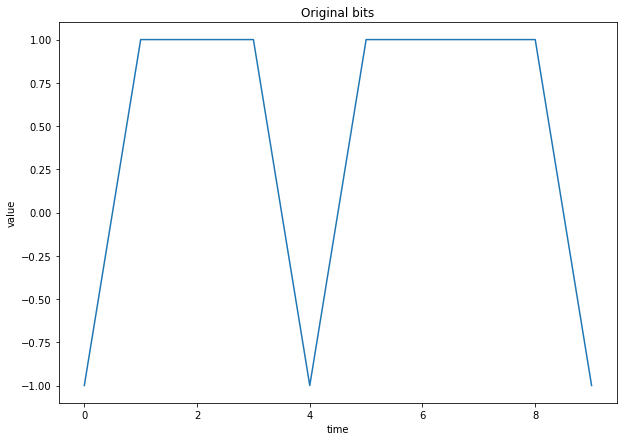

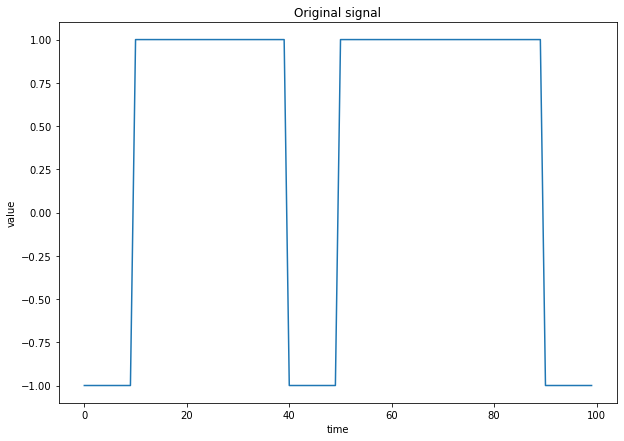

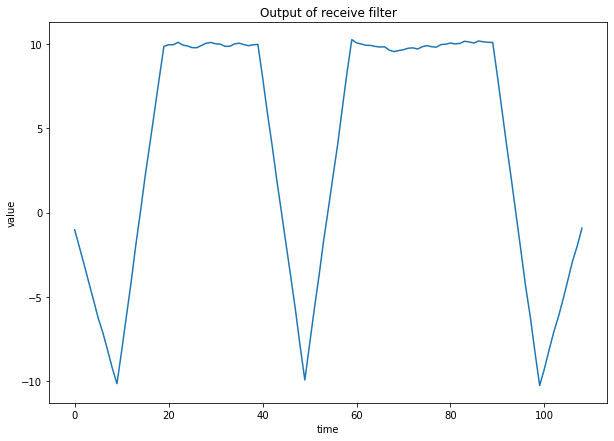

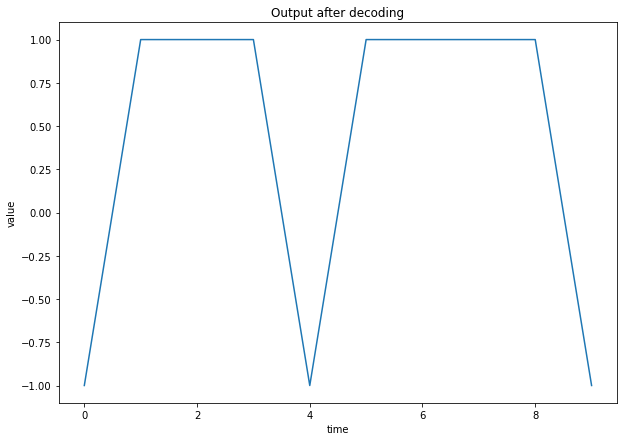

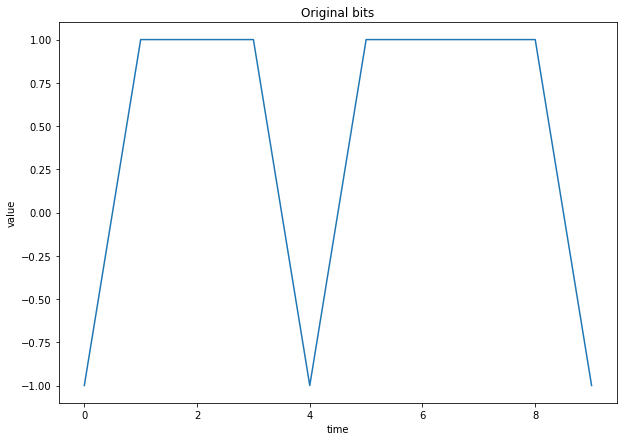

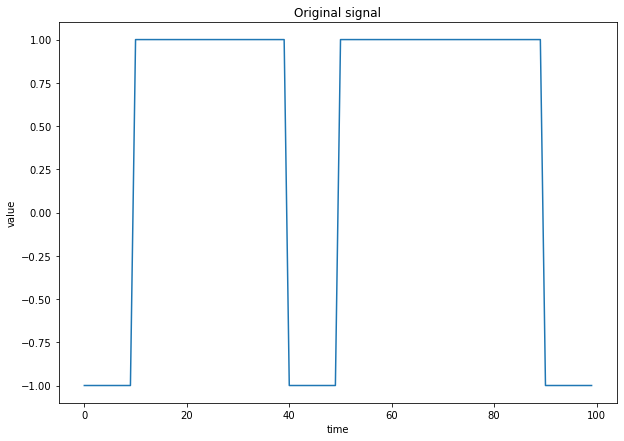

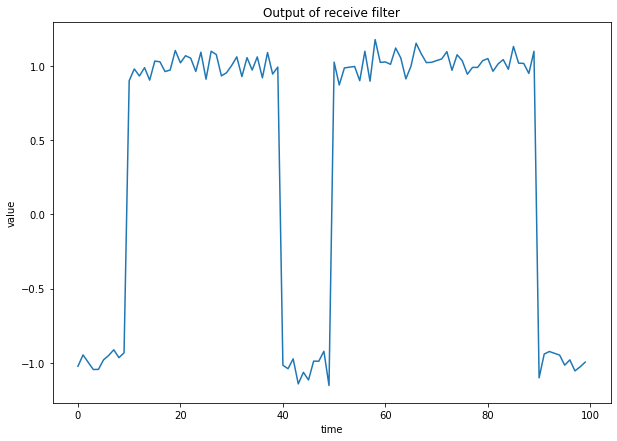

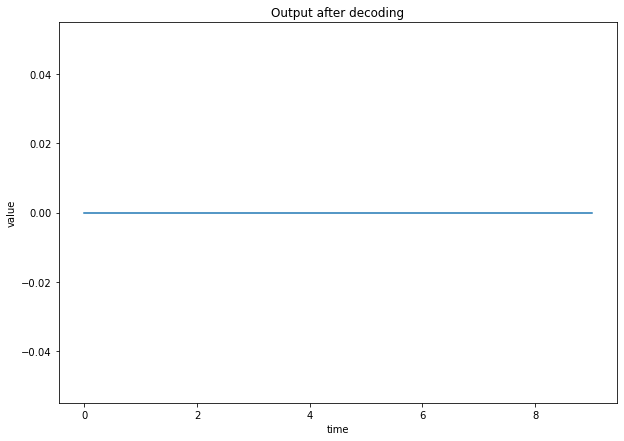

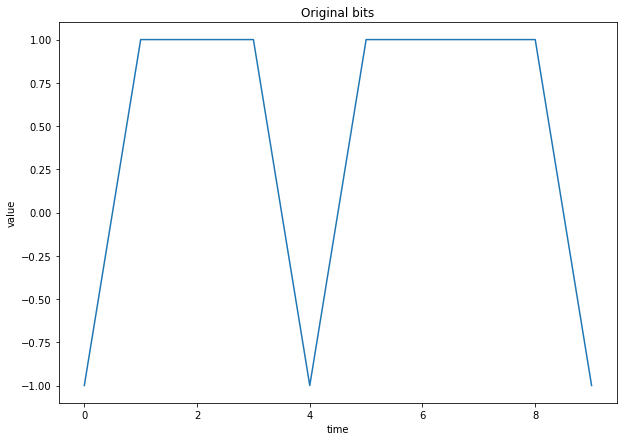

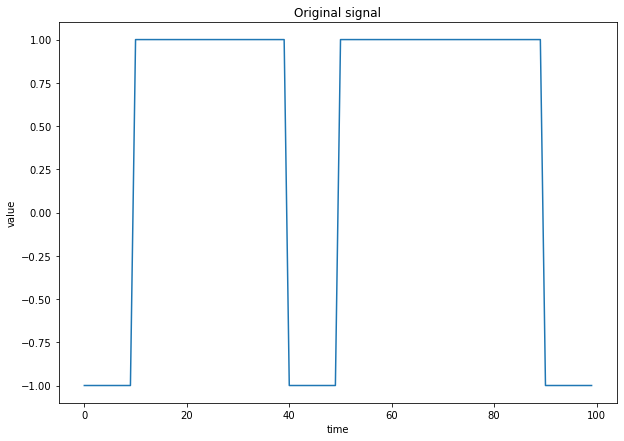

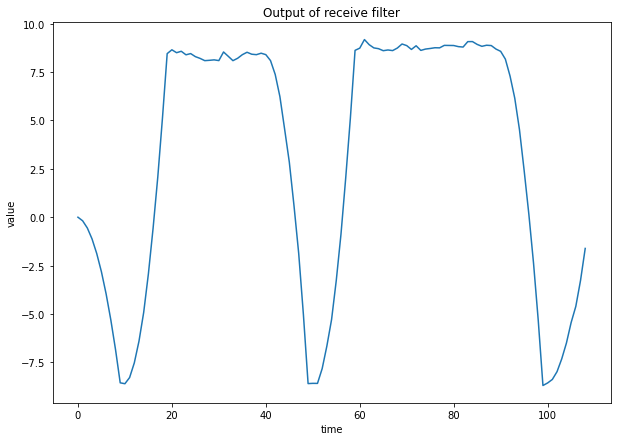

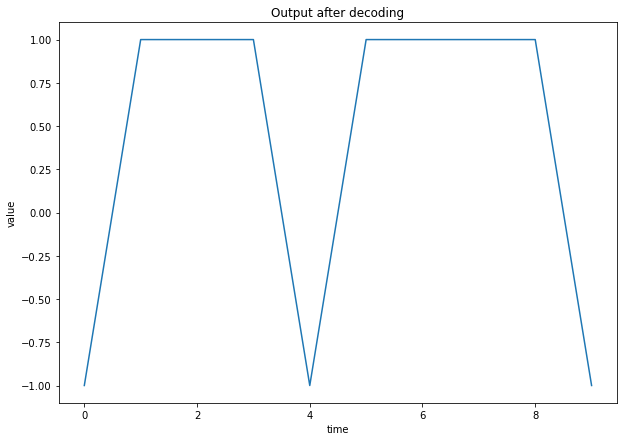

In [9]:
bits_no,bit_samples_no = 10 , 10
size = bits_no * bit_samples_no
signal_bits = generate_random_bits(bits_no)
receive_filter1 = np.ones(bit_samples_no)
receive_filter2 = None
receive_filter3 = np.linspace(0, 1, bit_samples_no) * np.sqrt(3)
sim_error1, thr_error1, sim_error2, thr_error2, sim_error3, thr_error3 = [], [], [], [], [], []
sim_error1, thr_error1 = test(receive_filter1, 1, True)
sim_error2, thr_error2 = test(receive_filter2, 1, True)
sim_error3, thr_error3 = test(receive_filter3, (3**0.5/2), True)

In [ ]:
# test to simulate error
bits_no,bit_samples_no = 1000000 , 10
signal_bits = generate_random_bits(bits_no)
sim_error1, thr_error1 = test(receive_filter1, 1, False)
sim_error2, thr_error2 = test(receive_filter2, 1, False)
sim_error3, thr_error3 = test(receive_filter3, (3**0.5/2), False)
# plot
plt.figure(figsize=(8,7))
x_axis_range = range(-10, 21)
plt.semilogy(x_axis_range,sim_error1,'r-')
plt.semilogy(x_axis_range,thr_error1,'ro')
plt.semilogy(x_axis_range,sim_error2,'g-')
plt.semilogy(x_axis_range,thr_error2,'g*')
plt.semilogy(x_axis_range,sim_error3,'b-')
plt.semilogy(x_axis_range,thr_error3,'b--')
plt.title('Bit Error Rate Simulation vs. Theortical')
plt.legend(['Sim BER 1', 'Thr BER 1', 'Sim BER 2', 'Thr BER 2', 'Sim BER 3', 'Thr BER 3'])
plt.xlabel('E/No')
plt.ylabel('BER')
plt.yscale('log')
plt.ylim(10**(-4))
plt.grid()
plt.show()